<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Principle Component Analysis**


![img](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/PCA.jpeg)

Estimated time needed: **45** minutes


## Use cases of PCA

*   Facial Recognition
*   Image Compression
*   Finding patterns in data of high dimension in the field of quantitative finance.

For instance, suppose you are a fund manager who has 200 stocks in a portfolio. To analyze the potential movements and relationships of the stocks, you would need to  at least work with a 200$\times$200 correlation or covariance matrix, which is very complex.

However, instead of looking at 200 stock variances, would it be more efficient to just look at 10 most dominant/principal directions of variances that best represent the original variances of the stocks?

PCA is a methodology to reduce the dimensionality of a complex problem.

<img src='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/images/fundmanager.jpg' style="width: 70%">


In this notebook, you will explore how to simplify and reduce the dimensionality of various data using **principle component analysis** (PCA)


## **Table of Contents**

<!-- <a href="#Principle-Component-Analysis">Principle Component Analysis</a> -->

<ol>
    <li><a href="https://#Objectives">Objectives</a></li>
    <li><a href="https://#Datasets">Datasets</a></li>
    <li>
        <a href="https://#Setup">Setup</a>
        <ol>
            <li><a href="https://#Installing-Required-Libraries">Installing Required Libraries</a></li>
            <li><a href="https://#Importing-Required-Libraries">Importing Required Libraries</a></li>
            <li><a href="https://#Defining-Helper-Functions">Defining Helper Functions</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Background">Background</a>
        <ol>
            <li><a href="https://##What-does-PCA-do?">What does PCA do?</a></li>
            <li><a href="https://#How-does-PCA-work?-(optional)">How does PCA work? (optional)</a></li>
        </ol>
    </li>
    <li>
        <a href="https://##Visual-Example">Visual Example</a>
        <ol>
            <li><a href="https://#Scaling-data">Scaling Data</a></li>
            <li><a href="https://#Applying-PCA">Applying PCA</a></li>
            <li><a href="https://#Putting-it-all-Together">Putting it all Together</a></li>
        </ol>
    </li>
    <li>
        <a href="https://#Using-PCA-to-Improve-Facial-Recognition">Using PCA to Improve Facial Recognition</a>
    </li>
</ol>

<a href="https://#Exercises">Exercises</a>

<ol>
    <li><a href="https://#Exercise-1---Scaling-the-Data">Exercise 1 - Scaling the Data</a></li>
    <li><a href="https://#Exercise-2---Fitting-PCA-Object">Exercise 2 - Fitting PCA Object</a></li>
    <li><a href="https://#Exercise-3---Finding-Desired-Number-of-Components">Exercise 3 - Finding Desired Number of Components</a></li>
    <li><a href="https://#Exercise-4---Dimensionality-Reduction">Exercise 4 - Dimentionality Reduction</a></li>
</ol>


***


## Objectives


After completing this lab you will be able to:


*   **Understand** what PCA is and how (generally) it works.
*   **Understand** when PCA is useful.
*   **Apply** PCA effectively.


## Datasets

Datasets for this lab are gathered from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2022-01-01) under the MIT License.


### Installing Required Libraries

The following required modules are pre-installed in the Skills Network Labs environment. However if you run this notebook commands in a different Jupyter environment (e.g. Watson Studio or locally) you will need to install these libraries by removing the `#` sign before `!mamba` in the code cell below.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from tqdm import tqdm
from itertools import accumulate
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from scipy.stats import loguniform

In [4]:
import warnings

warnings.filterwarnings('ignore')

In [5]:
sns.set_context('notebook')
sns.set_style('white')

### Helper Functions

Below, we define helper functions to simplify your code later on:


In [6]:
def plot_explained_variance(pca):
    # This function graphs the accumulated explained variance ratio for a fitted PCA object.
    acc = [*accumulate(pca.explained_variance_ratio_)]
    fig, ax = plt.subplots(1, figsize=(50, 20))
    ax.stackplot(range(pca.n_components_), acc)
    ax.scatter(range(pca.n_components_), acc, color='black')
    ax.set_ylim(0, 1)
    ax.set_xlim(0, pca.n_components_ - 1)
    ax.tick_params(axis='both', labelsize=36)
    ax.set_xlabel('N Components', fontsize=48)
    ax.set_ylabel('Accumulated explained variance', fontsize=48)
    plt.tight_layout()
    plt.show()

## Background

Before we begin using **PCA**, we should first understand:

1.  What PCA does
2.  How PCA Works


### What does PCA do?

*   Reduces the dimensionality of data. By reducing data dimensionality, PCA can also help with visualization.
*   May reduce noise in the process

\-Can be used to pre-process data improving the result of your algorithm


### How does PCA work? (optional)

1.  Looks at an $n$ -dimensional dataset and breaks it down into "general trends" or **components**

```
- When we say "$n$-dimensional", we mean the data has $n$ features.
```

2.  The components are then **sorted by how much of the explained variance they account for** (*eigenvalues* provide this information)

```
- This means if a component is highly-uncorrelated with all others, it's a "strong" component and provides useful information that is very hard to infer from all other components.
```

3.  Then, given some parameter (usually chosen by the data engineer), the new dimension of the data is decided. Let this be $k$.

```
- Note $k$ is always $k \leq n$ because we're only trying to reduce the dimension of our data.
```

4.  Finally, the original $n$ dimensional dataset is projected onto the $k$-dimensional plane chosen by our **top-$k$ components that take care of the most explained variance**.

```
- These top- $k$ components are now used 
```

Because principle components span an (at most) $k$-dimensional surface, we have successfully reduced our data to at least $k \leq n$ dimensions!


## Visual Example

Let's look at an example that will visually demonstrate PCA in action.

Load the dataset `HeightsWeights.csv` which contains a list of various people's heights (in inches) and weight (in pounds and kg):


In [7]:
hwdf = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML0187EN-SkillsNetwork/labs/module%203/data/HeightsWeights.csv', index_col=0)
hwdf.head()

,Height(Inches),Weight(Pounds),Weight(Kilograms)
Index,,,
1,65.78331,112.9925,51.253062
2,71.51521,136.4873,61.910233
3,69.39874,153.0269,69.412546
4,68.21660,142.3354,64.562914
5,67.78781,144.2971,65.452735


array([[<Axes: title={'center': 'Height(Inches)'}>,
        <Axes: title={'center': 'Weight(Pounds)'}>],
       [<Axes: title={'center': 'Weight(Kilograms)'}>, <Axes: >]],
      dtype=object)

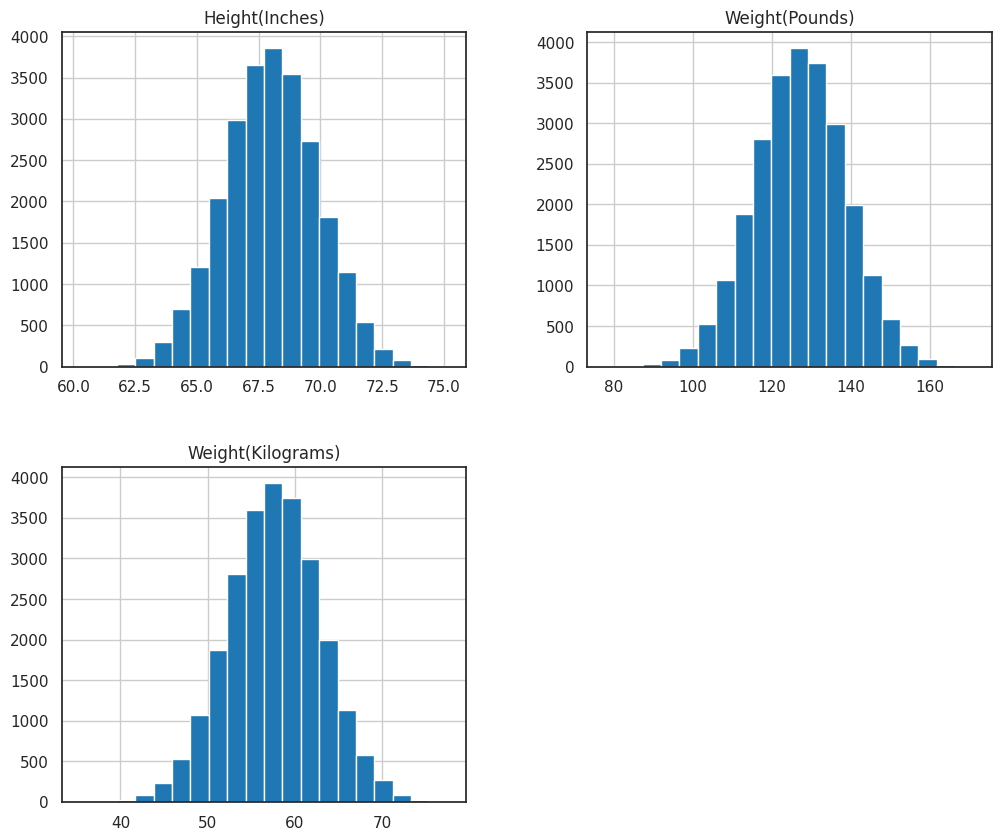

In [8]:
hwdf.hist(bins=20, figsize=(12, 10))

### Scaling data

**You should (almost) always scale your data before applying PCA**

**Why?**: There are many reasons, here are some:

*   Scaling your features make the features have the same standard deviation => same weight.

*   If the features have the same weight, PCA is able to best find the most significant components (principal components) without being biased towards features with high variance.

*   Computers do not do well in adding large numbers and small numbers, so, if all data is in the same range  algorithms usually perform better.

Let's use the `StandardScaler` from `sklearn.preprocessing`:


In [10]:
ss = StandardScaler()
hwdf[:] = ss.fit_transform(hwdf)
hwdf.columns = [f"{c} scaled" for c in hwdf.columns]
hwdf.head()

,Height(Inches) scaled,Weight(Pounds) scaled,Weight(Kilograms) scaled
Index,,,
1,-1.162051,-1.208072,-1.208072
2,1.852136,0.806805,0.806805
3,0.739165,2.225214,2.225214
4,0.117523,1.308328,1.308328
5,-0.107961,1.476561,1.476561


Let's look at 3-D plot of our data (one dimension per feature):


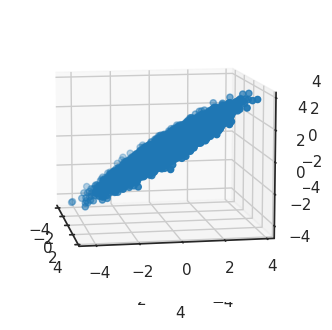

In [14]:
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
xs, ys, zs = [hwdf[col] for col in hwdf.columns]
ax1.scatter(xs, ys, zs)

ax2 = fig.add_subplot(121, projection='3d')
ax2.view_init(elev=10, azim=-10)
ax2.scatter(xs, ys, zs)

plt.tight_layout()
plt.show()

As you can see, our data here forms a plane.

This is because the *weight in kilograms does not provide any more information than weight in pounds* (or vice-versa).

This becomes clear with the following, alternate perspective, showing the 2d relationships between the pairs of data and calculating the correlation  :


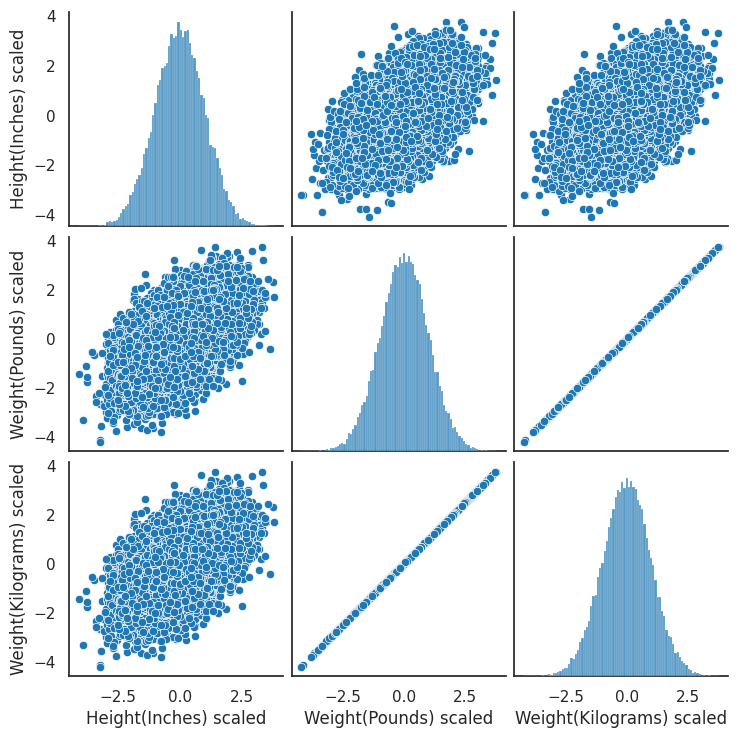

In [15]:
sns.pairplot(hwdf)
plt.show()

In [16]:
hwdf.corr().style.background_gradient(cmap='coolwarm')

,Height(Inches) scaled,Weight(Pounds) scaled,Weight(Kilograms) scaled
Height(Inches) scaled,1.000000,0.502859,0.502859
Weight(Pounds) scaled,0.502859,1.000000,1.000000
Weight(Kilograms) scaled,0.502859,1.000000,1.000000


We see the weights are perfectly correlated, which means **Weight(Pounds)** tells us everything we need to know about **Weight(Kilograms)** ,thus we have clearly **redundant** data! Although, this example is exaggerated, it'll help demonstrate where PCA shines.
